## Traffic flow model - Nagel-Schreckenberg model

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
def init_lattice(L,t,d):
    s = np.zeros((t,L))
    first_line = np.zeros((1,L))
    first_line[0][0:int(d*L)] = 1
    random.shuffle(first_line[0])
    s[-1] = first_line[0]
    
    
    velocity = np.zeros((t,L))
    velocity[-1] = s[-1] * 5 #np.random.randint(1, 6, size=(1, L))
    
    return s, velocity

### init_lattice generates lattice and velocity matrix with size (T,L) with initial state on bottom row

In [7]:
X = init_lattice(100,100,0.3)
X[0][-1][0:10],X[1][-1][0:10]

(array([0., 1., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0., 5., 0., 5., 0., 0., 5., 0., 0., 5.]))

In [9]:
def distance_between_non_zeros(vector):
    n = len(vector)
    distances = [0] * n

    non_zero_indices = [i for i, value in enumerate(vector) if value != 0]
    num_non_zeros = len(non_zero_indices)

    for i in range(num_non_zeros):
        current_index = non_zero_indices[i]
        next_index = non_zero_indices[(i + 1) % num_non_zeros]

        distance = (next_index - current_index) % n
        distances[current_index] = distance -1 

    return np.array(distances)

### this function returns array with distances between a certain car and first car ahead of him

In [11]:
distance_between_non_zeros(X[0][-1][0:10])

array([0, 1, 0, 2, 0, 0, 2, 0, 0, 1])

In [15]:
def update_positions(cars_matrix, velocity_matrix, timestep, p):
    cars = cars_matrix[-1 - timestep]
    velocity = velocity_matrix[-1 - timestep]

    non_zero_mask = cars > 0
    velocity[non_zero_mask] = np.minimum(velocity[non_zero_mask] + 1, 5)
    
    distances = distance_between_non_zeros(cars)
    move = np.minimum(distances, velocity)


    velocity = np.minimum(velocity, move)
    

    slow_down_mask = np.random.rand(len(cars)) <= p
    move[slow_down_mask] = np.maximum(move[slow_down_mask] - 1, 0)

    car2 = np.zeros_like(cars)
    vel2 = np.zeros_like(move)

    for i in range(len(cars)):
        if cars[i] == 1:

            new_position = (i + int(move[i])) % len(cars)
            car2[new_position] = 1
            vel2[new_position] = move[i]


    cars_matrix[-2 - timestep] = car2
    velocity_matrix[-2 - timestep] = vel2


### This function takes cars, velocity matrix and timestep we want to calculate
1. then it increases velocity of every car but not over max value
2. then it calculates maximum units a car can go forward and if its lower than its velocity it changes it to that distance
3. then we have randomization part and we slow some cars down with probability p
4. lastly it updates cars and velocity matrix with new state on row above the previous one

In [13]:
def model(L,t,d,p):
    car,vel = init_lattice(L,t,d)
    
    for i in range(t-1):
        update_positions(car, vel, i, p)
    return car,vel

In [16]:
x = model(100,100,.4,0.5)

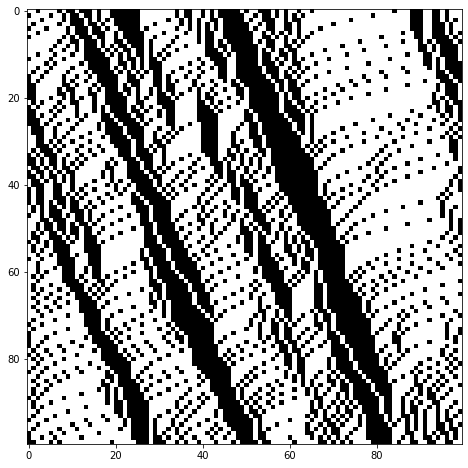

In [18]:
plt.figure(figsize=(8,8))
plt.imshow(x[0],cmap="Greys")
plt.show()

### This is example run for rho = 0.4 and p = 0.5
### first state is on bottom of array and last one on top of it, cars move to the right

In [29]:
res = [] 
ro = np.linspace(0,1,101)#[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
p = [0,0.3,0.6,0.9]
for j in p:
    ps = []
    for i in ro:
        a = 0
        for _ in range(50):
            
            x = model(1000,100,i,j)
            x_mean = np.sum(x[0][-1])
            a += np.sum(x[1][0])/(x_mean*50)
        ps.append(a)
    res.append(ps)

C:\Users\kacpe\AppData\Local\Temp\ipykernel_11252\73490962.py:12: RuntimeWarning: invalid value encountered in double_scalars
  a += np.sum(x[1][0])/(x_mean*50)


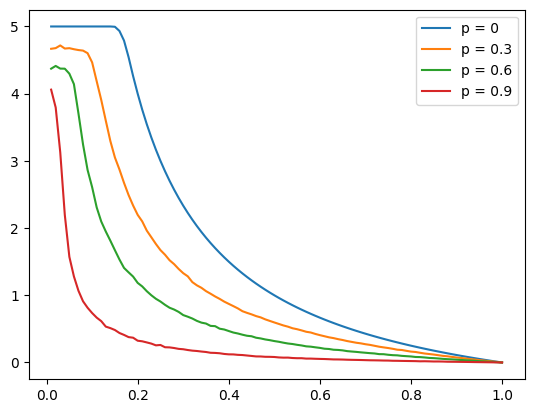

In [34]:
%matplotlib inline
for i in range(len(res)):
    plt.plot(ro,res[i],label = "p = {}".format(p[i]))
plt.legend()
plt.show()

## Graph shows average velocity as a function of density for different probabilities
### We can see that for density around 0.2 average velocity decreases very fast

# p = 0.3 rho = 0.1

In [8]:
import matplotlib.pyplot as plt
import imageio
import glob

def giff(folder,gifname):
    frames = []
    for t in range(len(glob.glob(folder + '/*.png'))):
        image = imageio.v2.imread(folder+"/{}.png".format(t+1))
        frames.append(image)
    imageio.mimsave('./{}.gif'.format(gifname),
            frames,          
            duration = 5,
            loop = 0) 

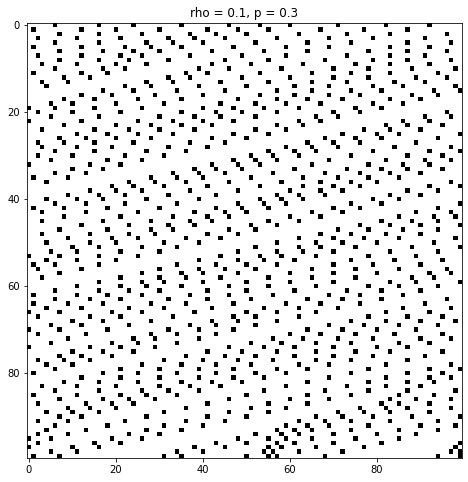

In [20]:
x = model(100,100,.1,0.3)
plt.figure(figsize=(8,8))
plt.title("rho = 0.1, p = 0.3")
plt.imshow(x[0],cmap="Greys")
plt.show()

## With a low initial density, there are fewer interactions between cars, and the traffic flows relatively smoothly

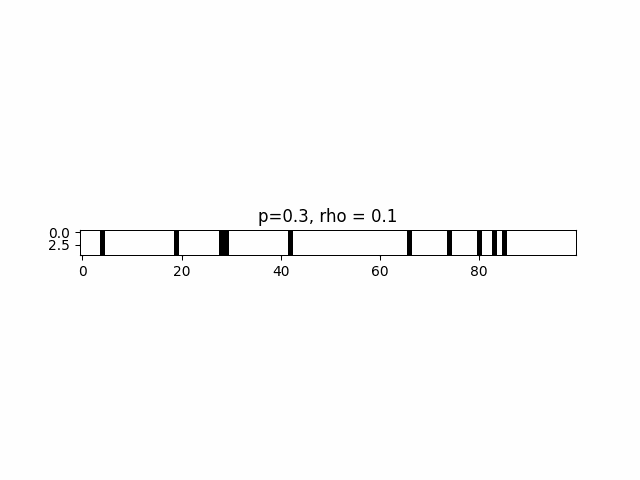

In [24]:
import matplotlib
a = 0
matplotlib.use('Agg')
for i in reversed(x[0]):
    a += 1
    y = np.zeros((5,100))
    y[0], y[1],y[2],y[3],y[4] = i,i,i,i,i
    plt.imshow(y,cmap="Greys")
    plt.title("p=0.3, rho = 0.1")
    plt.savefig("traffic_pics/{}.png".format(a))
    #plt.show()
giff("traffic_pics","p03rho01")   
from IPython.display import Image
Image(filename="p03rho01.gif")

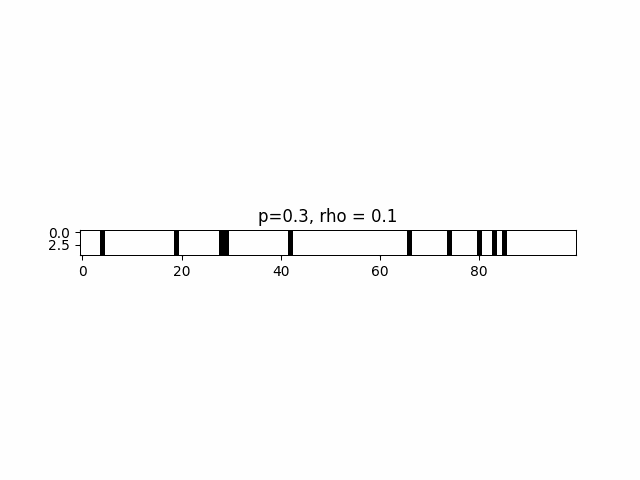

# p = 0.3 rho = 0.2

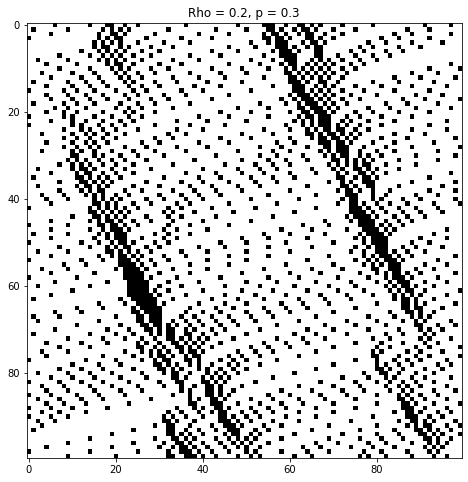

In [21]:
%matplotlib inline
x = model(100,100,.2,0.3)
plt.figure(figsize=(8,8))
plt.title("Rho = 0.2, p = 0.3")
plt.imshow(x[0],cmap="Greys")
plt.show()

## We can see that for rho 0.2 we see more interactions between cars, resulting in some congestion and slower average speeds. Traffic dynamics are more interesting with occasional traffic jams.

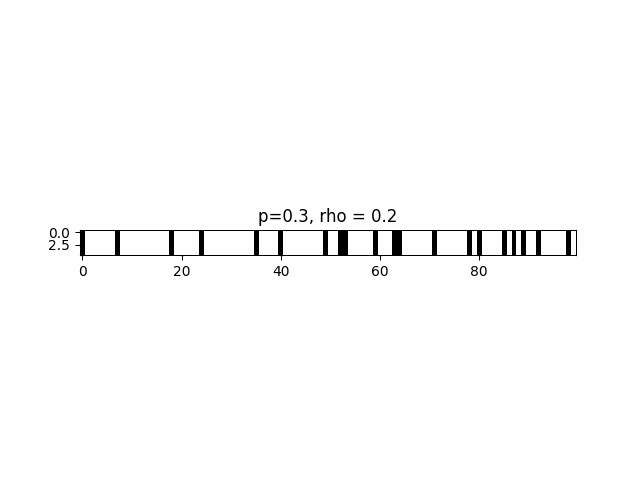

In [26]:
import matplotlib
a = 0
matplotlib.use('Agg')
for i in reversed(x[0]):
    a += 1
    y = np.zeros((5,100))
    y[0], y[1],y[2],y[3],y[4] = i,i,i,i,i
    plt.imshow(y,cmap="Greys")
    plt.title("p=0.3, rho = 0.2")
    plt.savefig("traffic_pics/{}.png".format(a))
    #plt.show()
giff("traffic_pics","p03rho02")   
from IPython.display import Image
Image(filename="p03rho02.gif")

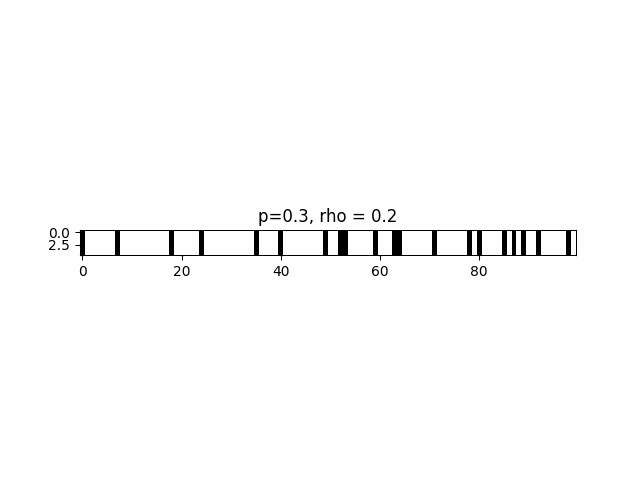

# p = 0.3 rho = 0.6

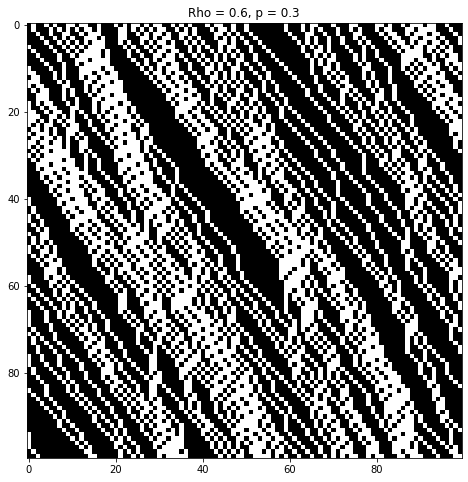

In [22]:
%matplotlib inline
x = model(100,100,.6,0.3)
plt.figure(figsize=(8,8))
plt.title("Rho = 0.6, p = 0.3")
plt.imshow(x[0],cmap="Greys")
plt.show()

## For rho = 0.6 we can see a lot of dense areas, there are a lot of clusters of cars and longer-lasting traffic jams. High initial density often leads to congestion and slower overall traffic flow. 

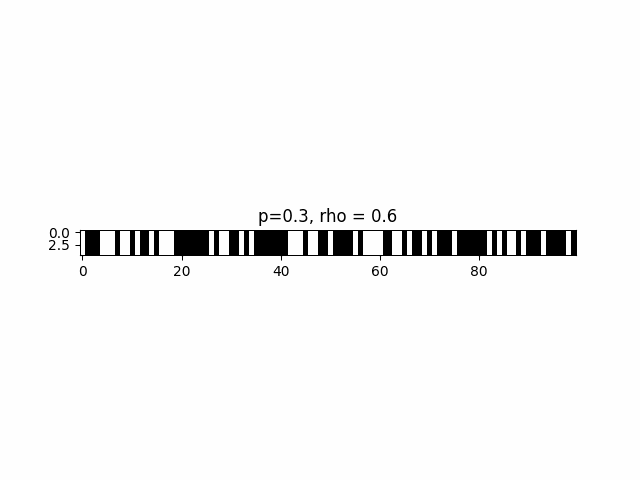

In [28]:
import matplotlib
a = 0
matplotlib.use('Agg')
for i in reversed(x[0]):
    a += 1
    y = np.zeros((5,100))
    y[0], y[1],y[2],y[3],y[4] = i,i,i,i,i
    plt.imshow(y,cmap="Greys")
    plt.title("p=0.3, rho = 0.6")
    plt.savefig("traffic_pics/{}.png".format(a))
    #plt.show()
giff("traffic_pics","p03rho06")   
from IPython.display import Image
Image(filename="p03rho06.gif")

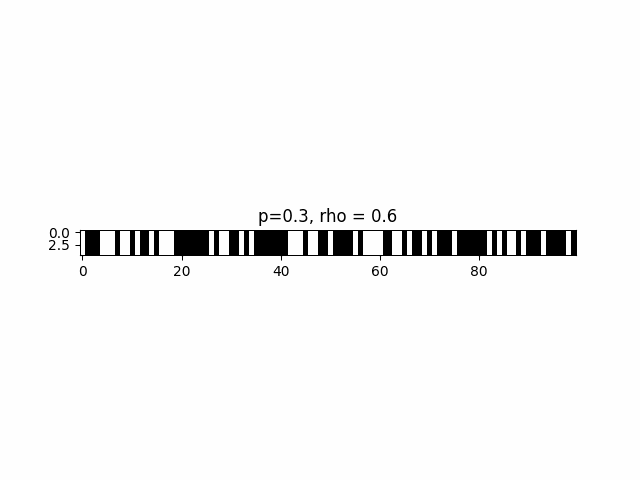